# Clustering
## Intuition

Ziel: Organisiere eine Datenmenge in Gruppen und zwar so, dass die Beobachtungen innerhalb einer Gruppe zueinander ähnlicher sind, als zu Beobachtungen anderer Gruppen.

Annahme: Die Daten repräsentieren Features, die es möglich machen Gruppen voneinander zu unterscheiden.

Clustering gehört im Machine Learning Bereich zu den Problemen des Unüberwachten Lernens (unsupervised learning), da a priori nichts über die Gruppen bekannt ist.

- Zahl der Gruppen?
- Was ist die Struktur der Gruppen?
- Gibt es überhaupt Gruppen?

### Clustering: Ziel

Ziel von Clustering Methoden ist es, den Datensatz in möglichst ähnliche Partitionen zu zerteilen, d.h.

- Datenpunkte innerhalb einer solchen Partition, auch Cluster genannt, unterscheiden sich wenig,
- Datenpunkte verschiedener Cluster unterscheiden sich mehr.

Clustering Methoden sind auf ein Maß von (Un-)Ähnlichkeit angewiesen, was meist nur für reellwertige Daten wohl definiert ist. Wir beschränken uns daher auf Probleme mit  $D \subseteq \mathbb{R}^d$.

### Unterschied zwischen PCA und Clustering

- PCA versucht eine Darstellung der Datenpunkte in einem Raum geringerer Dimension zu finden. Sie ermöglicht potentiell eine bessere Trennung der Daten, trennt sie jedoch nicht direkt.
- Clustering versucht tatsächliche Trennungen zu finden.

### K-Means Clustering: Partitionierende Verfahren

Bei partitionierenden Verfahren muss die Anzahl $ K $ der Cluster vorab festgelegt werden.
Idee:

- Start: Beliebige Einteilung der Beobachtungen in $ K $ Cluster
- Schrittweise neue Zuordnung, solange das eine Verbesserung bringt
- Ziel: Cluster enthalten möglichst ähnliche Objekte; zueinander sind die Cluster möglichst heterogen

### Beispiel: Clustering von Projektleitern

Suche Projektleiter, der für das spezielle Vorhaben besonders gut geeignet ist. Bewerte 7 mögliche Kandidaten und Kandidatinnen anhand von Motivation und Kompetenz, je gemessen auf einer Skala von 0 bis 100.

Start: Zufällige Zuordnung in 2 Cluster

### 1. Schritt: Berechnung der Mittelwerte der Cluster

### 2. Schritt: Berechnung der Entfernung  aller Objekte zu den Cluster - Zentren (eukl. Abst.)
 
Und Ordnen der Objekte den Clustern zu, zu deren Zentrum sie den geringsten Abstand haben.

### 3. Schritt Berechnung der Zentren der neuen Cluster:

Veränderung wie in (2) der Zuordnung auf Basis des kleineren Abstandes zu m1 und m2

### Ende: Wiederholung bis alle Cluster stabil sind

### K-Means Clustering: Formulierung

Beim K-Means Clustering wird zunächst die Anzahl der Cluster \( K \in \mathbb{N} \) als Hyperparameter vorgegeben. Anschließend wird automatisiert versucht eine möglichst gute Partitionierung der \( n \) Datenpunkte zu finden, d.h. unter den Bedingungen

- $ C_1 \cup C_2 \cup \cdots \cup C_K = \{1, \ldots, n\} $ und
- $ C_i \cap C_j = \emptyset $ für alle $ i \neq j $

minimieren wir ein Maß \( W(C) \) für die Varianz innerhalb der Cluster, d.h.

$ \arg \min_{C_1, \ldots, C_K} \sum_{k=1}^K W(C_k). $

### K-Means Clustering: Varianzmaß

Eine übliche Wahl für das Varianzmaß ist die quadrierte euklidische Distanz

$ W(C_k) = \frac{1}{|C_k|} \sum_{i, j \in C_k} \| x^{(i)} - x^{(j)} \|^2_2 $

welches umgeformt werden kann zu

$ W(C_k) = 2 \sum_{i \in C_k} \| x^{(i)} - \bar{x}^{(k)} \|^2_2 $

mit

$ \bar{x}^{(k)} = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}, $

dem Cluster-Schwerpunkt von Cluster $ C_k $

### Abbildung: K-Means Clustering

Beispielsdatensatz mit 150 Datenpunkten geclustert in \( k = 2, 3, 4 \) Cluster mit Hilfe von K-Means. Abbildung entnommen aus [JWHT14].

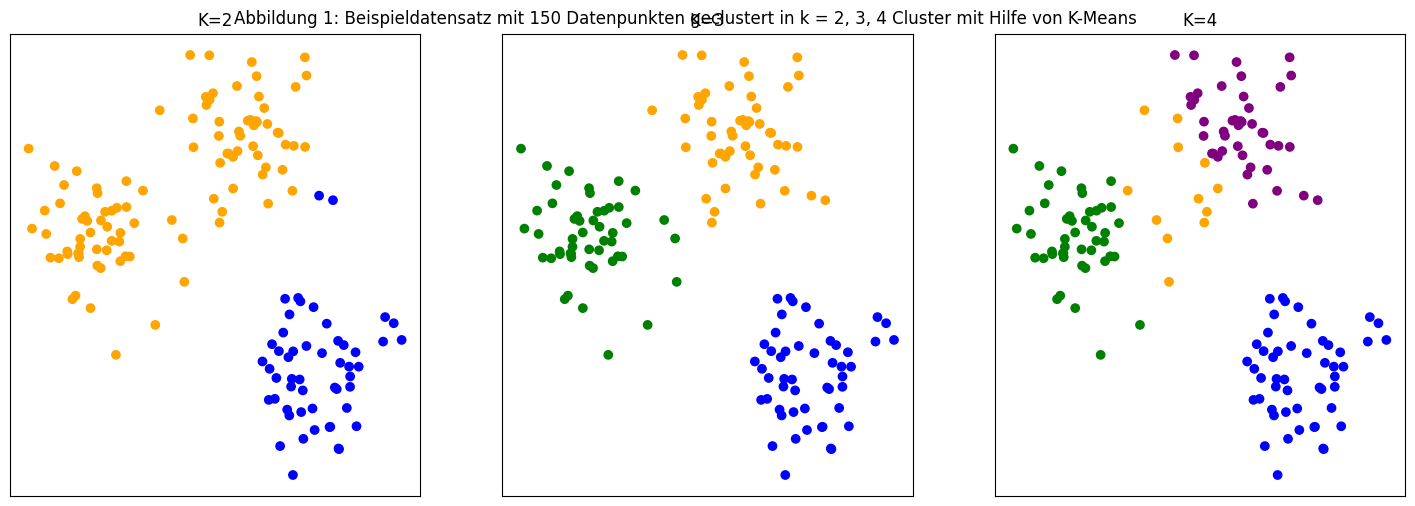

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generating data with 3 distinct clusters
points, labels_true = make_blobs(n_samples=150, centers=3, cluster_std=0.60, random_state=0)

# Creating KMeans clusters for k=2, k=3, k=4
kmeans_k2 = KMeans(n_clusters=2, random_state=0).fit(points)
kmeans_k3 = KMeans(n_clusters=3, random_state=0).fit(points)
kmeans_k4 = KMeans(n_clusters=4, random_state=0).fit(points)

labels_k2 = kmeans_k2.labels_
labels_k3 = kmeans_k3.labels_
labels_k4 = kmeans_k4.labels_

# Creating color maps for different k values
colors_k2 = ['orange' if label == 0 else 'blue' for label in labels_k2]
colors_k3 = ['orange' if label == 0 else 'blue' if label == 1 else 'green' for label in labels_k3]
colors_k4 = ['orange' if label == 0 else 'blue' if label == 1 else 'green' if label == 2 else 'purple' for label in labels_k4]

# Plotting the clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(points[:, 0], points[:, 1], c=colors_k2)
axes[0].set_title("K=2")
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].scatter(points[:, 0], points[:, 1], c=colors_k3)
axes[1].set_title("K=3")
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].scatter(points[:, 0], points[:, 1], c=colors_k4)
axes[2].set_title("K=4")
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.suptitle("Abbildung 1: Beispieldatensatz mit 150 Datenpunkten geclustert in k = 2, 3, 4 Cluster mit Hilfe von K-Means", y=0.92)
plt.show()

### K-Means Clustering: Partitionierungsmöglichkeiten

Für $ n $ Datenpunkte und $ K $ Cluster gibt es annähernd $K^n $ verschiedene Möglichkeiten der Partitionierung. Die Suche nach dem globalen Optimum durch Probieren aller Möglichkeiten (Brute-Force) ist daher meist nicht möglich bzw. sinnvoll. Jedoch bieten bereits lokale Optima meist gute Cluster, für deren Suche ein effizienter Algorithmus existiert.

### Algorithmus: K-Means Clustering

Algorithm 1 `kmeans_cluster(D, K)`

1. for  $ i \in \{1, \ldots, n\}  $ do
2. cluster(i) = random(1,K)
3. end for
4. while any cluster(i) has changed do
5. for  $ k \in \{1, \ldots, K\}  $ do
6.  $ C_k = \{i | cluster(i) = k\}  $
7.  $ \bar{x}^{(k)} = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}  $
8. end for
9. for  $ i \in \{1, \ldots, n\}  $ do
10. cluster(i) = argmin $_{1, \ldots, K} $  $ \| x^{(i)} - \bar{x}^{(k)} \|^2_2  $
11. end for
12. end while
13. return cluster

### Abbildung: Schrittweise Ausführung des K-Means Clustering Algorithmus



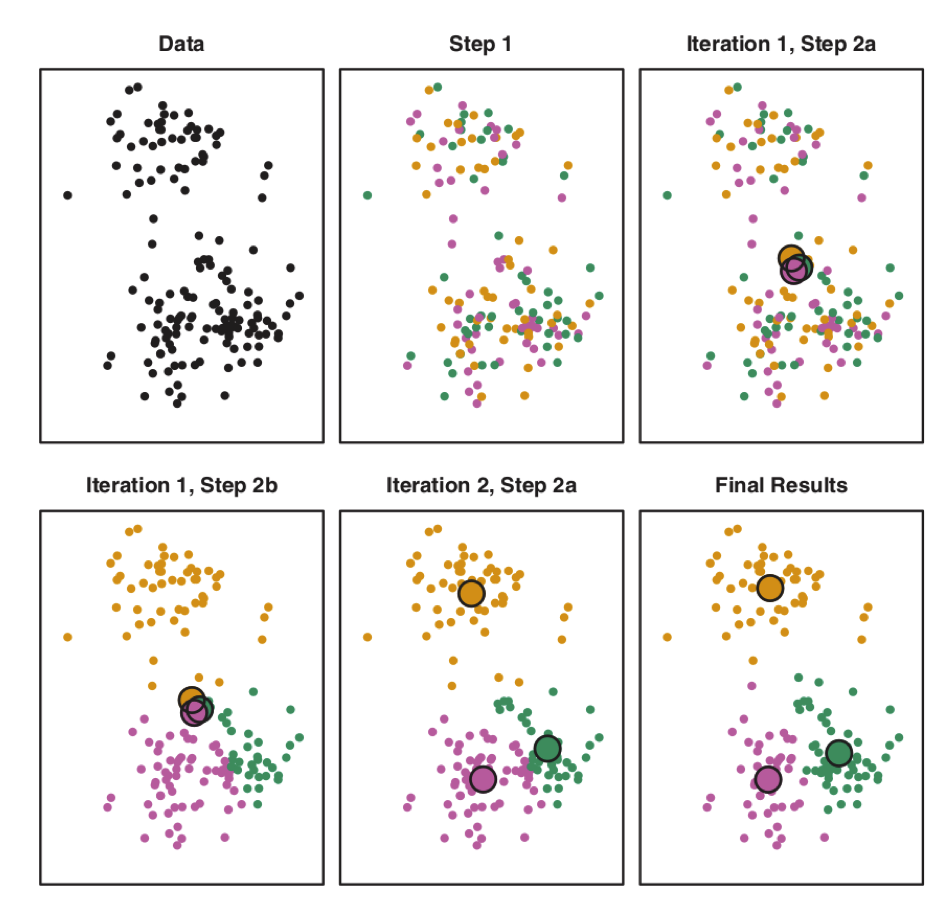

In [4]:
from IPython.display import Image, display

# Bild anzeigen
image_path = "media/kmeans_steps.png"  # Pfad zum Bild
display(Image(filename=image_path))

### Mehrfache Anwendung des K-Means Algorithmus

Da der K-Means Clustering Algorithmus lediglich ein lokales Optimum ausgehend von einer zufälligen initialen Clusterzuweisung liefert, sollte der Algorithmus mehrmals auf die Daten angewendet werden, um ein möglichst gutes Clustering zu finden.

### Abbildung: Wiederholte Ausführung des K-Means Clustering Algorithmus

Wiederholte Ausführung des K-Means Clustering Algorithmus auf das Beispiel $ K = 3 $ kann zu unterschiedlich guten Ergebnissen führen. Abbildung entnommen aus 

## Hierarchische Clusteranalyse: Einführung

Ein Nachteil von K-Means ist, dass die Anzahl der Cluster fest vorgegeben ist und vor Anwendung gewählt werden muss. Methoden aus der Hierarchischen Clusteranalyse erstellen ein Dendrogramm, eine baumartige Repräsentation des Clusterings der Datenpunkte mit variierender Clusteranzahl.

Hierbei gibt es zwei Möglichkeiten der Erstellung:

- bottom-up (agglomerativ): Cluster starten als einzelne Datenpunkte und verschmelzen sukzessiv zu größeren Clustern
- top-down (divisiv): Ein Cluster mit allen Datenpunkten wird sukzessive geteilt

Wir beschäftigen uns hier lediglich mit einer bottom-up Methode.

### Beispiel: Clustering von Studierenden

Studierende bewerten wie interessant sie eine Vorlesung finden, gemessen auf einer Skala von 0 bis 100. Wir wollen Studierende mit einer ähnlichen Bewertung zusammenfassen.

### 1. Schritt: Jeder befragte bildet einen CLuster

Distanz von jedem Cluster zu jedem Anderen berechnen.

### Schritt 2: Neue CLuster aus zwei CLustern die geringste Distanz hatten

Der geringste Abstand wird zuerst gespeichert

### Schritt 3: Nochmal CLuster verbinden mit minimalen Abstand



### Dendrogramme

Dendrogramme bieten eine Möglichkeit, die einzelnen Schritte von agglomerativen Verfahren grafisch darzustellen.

### Abbildung: Beispieldatensatz mit \( K = 3 \) Clustern

Beispieldatensatz mit \( K = 3 \) echten Clustern. Abbildung entnommen aus.

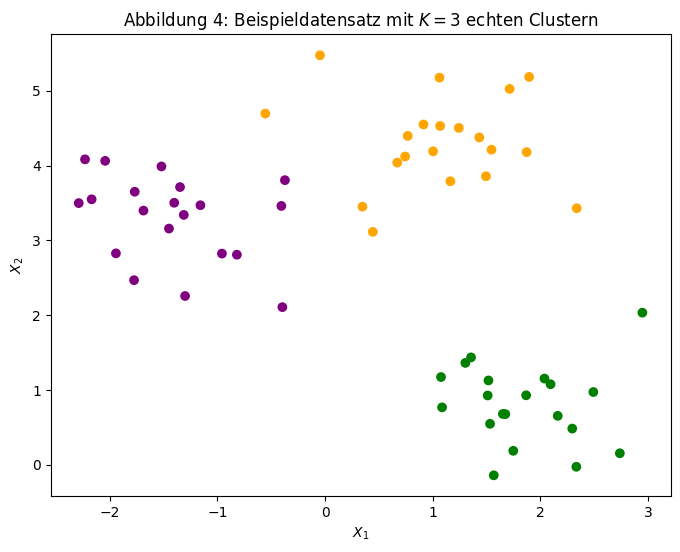

In [5]:
# Generating data with 3 distinct clusters
points_example, labels_example = make_blobs(n_samples=60, centers=3, cluster_std=0.60, random_state=0)

# Creating color map for k=3
colors_example = ['orange' if label == 0 else 'green' if label == 1 else 'purple' for label in labels_example]

# Plotting the example dataset
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the points
ax.scatter(points_example[:, 0], points_example[:, 1], c=colors_example)
ax.set_title("Abbildung 4: Beispieldatensatz mit $K=3$ echten Clustern")
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")

plt.show()

### Abbildung: Agglomeratives Dendrogramm

Agglomeratives Dendrogramm des Beispieldatensatzes. Blätter entsprechen einzelnen Datenpunkten, Knoten (Datenpunkte oder Cluster) werden auf Höhe des Abstandsmaßes durch Linien zu einem neuen Cluster verschmolzen. Abbildung entnommen aus.

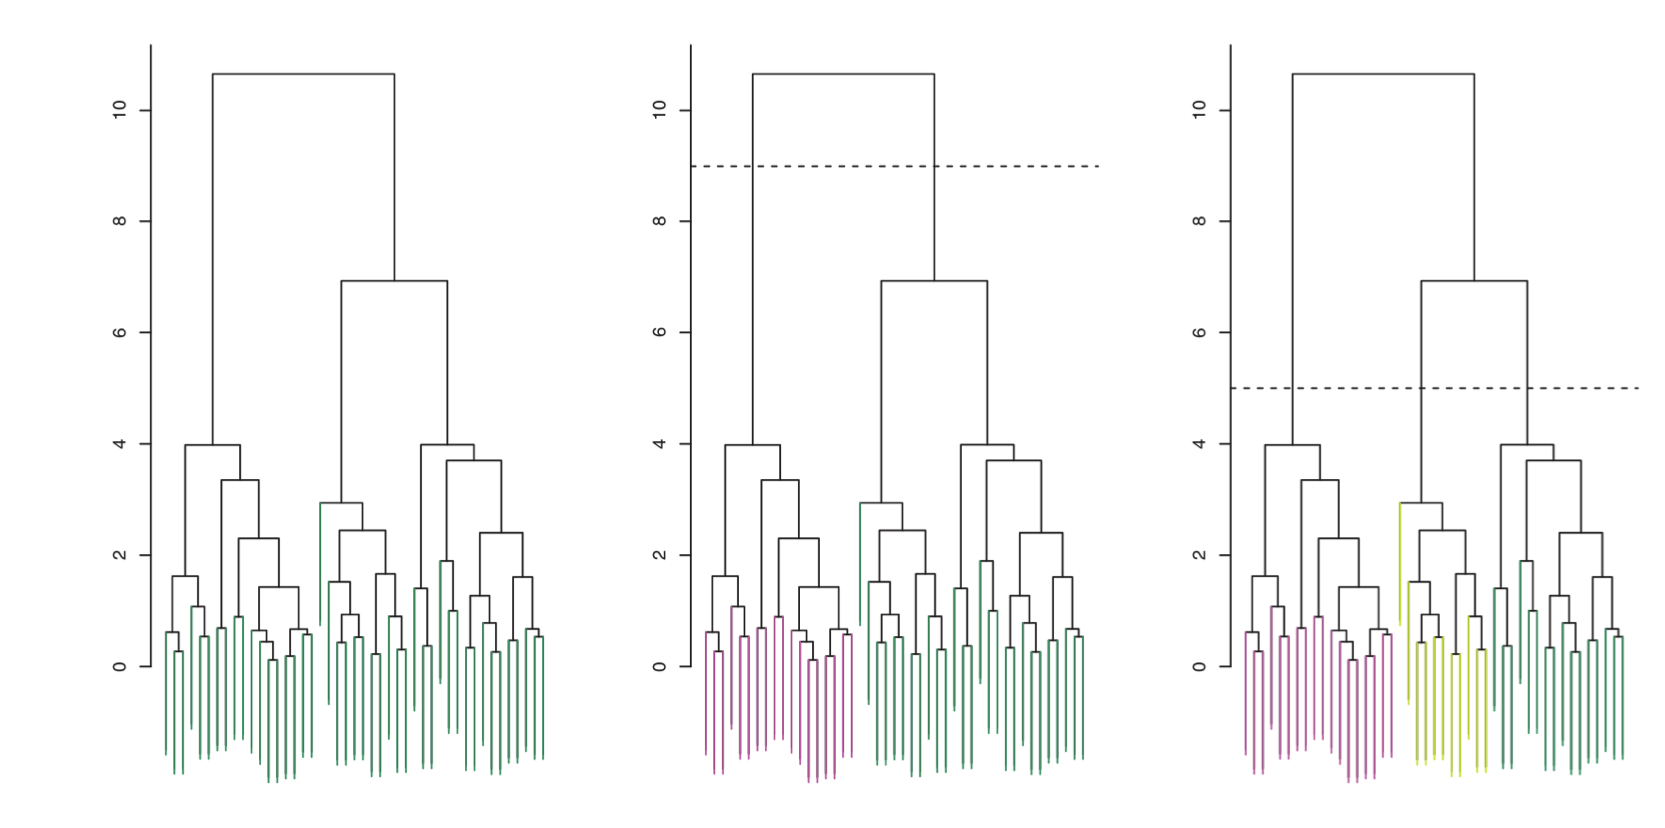

In [8]:
# Bild anzeigen
image_path = "media/hierarchische.png"  # Pfad zum Bild
display(Image(filename=image_path))

### Hinweise zu Dendrogrammen

- Ähnlichkeitsaussagen können nur vertikal aber nicht horizontal getroffen werden.
- In einem Dendrogramm kann durch Sichtbetrachtung ein Clustering für $ K \in \{1, \ldots, n\} $ Cluster gewählt werden.
- Hierarchische Clustering-Verfahren nehmen an, dass die Cluster von Tiefe $ m-1 $ in den Clustern von Tiefe $ m $ (bei agglomerativen Verfahren von unten gesehen) enthalten sind. Das führt nicht unbedingt zum besten Ergebnis und K-Means z.B. könnte besser abschneiden.

### Varianzmaß für Hierarchische Clusteranalyse

Auch hier benötigen wir ein Maß für die Varianz (Unähnlichkeit) zwischen zwei Datenpunkten. Wir wählen wieder den quadrierten euklidischen Abstand

$ d(x^{(i)}, x^{(j)}) = \| x^{(i)} - x^{(j)} \|^2_2. $

Dieses Maß zwischen Datenpunk ten müssen wir auf ein Varianz-Maß zwischen Clustern, also Mengen von Datenpunkten, auch Linkage genannt, heben. Hier gibt es viele Möglichkeiten.

### Linkage Definitionen

Linkage Definition $d(C_a, C_b)$ Hinweis
- Complete $\max_{i \in C_a, j \in C_b} d(x^{(i)}, x^{(j)})$ Balancierte Cluster
- Single $\min_{i \in C_a, j \in C_b} d(x^{(i)}, x^{(j)})$ Häufige Fusion Datenpunkt mit Cluster
- Average $\frac{1}{|C_a||C_b|} \sum_{i \in C_a, j \in C_b} d(x^{(i)}, x^{(j)})$ Balancierte Cluster
- Centroid $d \left( \frac{1}{|C_a|} \sum_{i \in C_a} x^{(i)}, \frac{1}{|C_b|} \sum_{j \in C_b} x^{(j)} \right)$ Inversion (sinkende Distanz) möglich

### Abbildung: Beispiel - Complete Linkage

Beispiel - Complete Linkage.

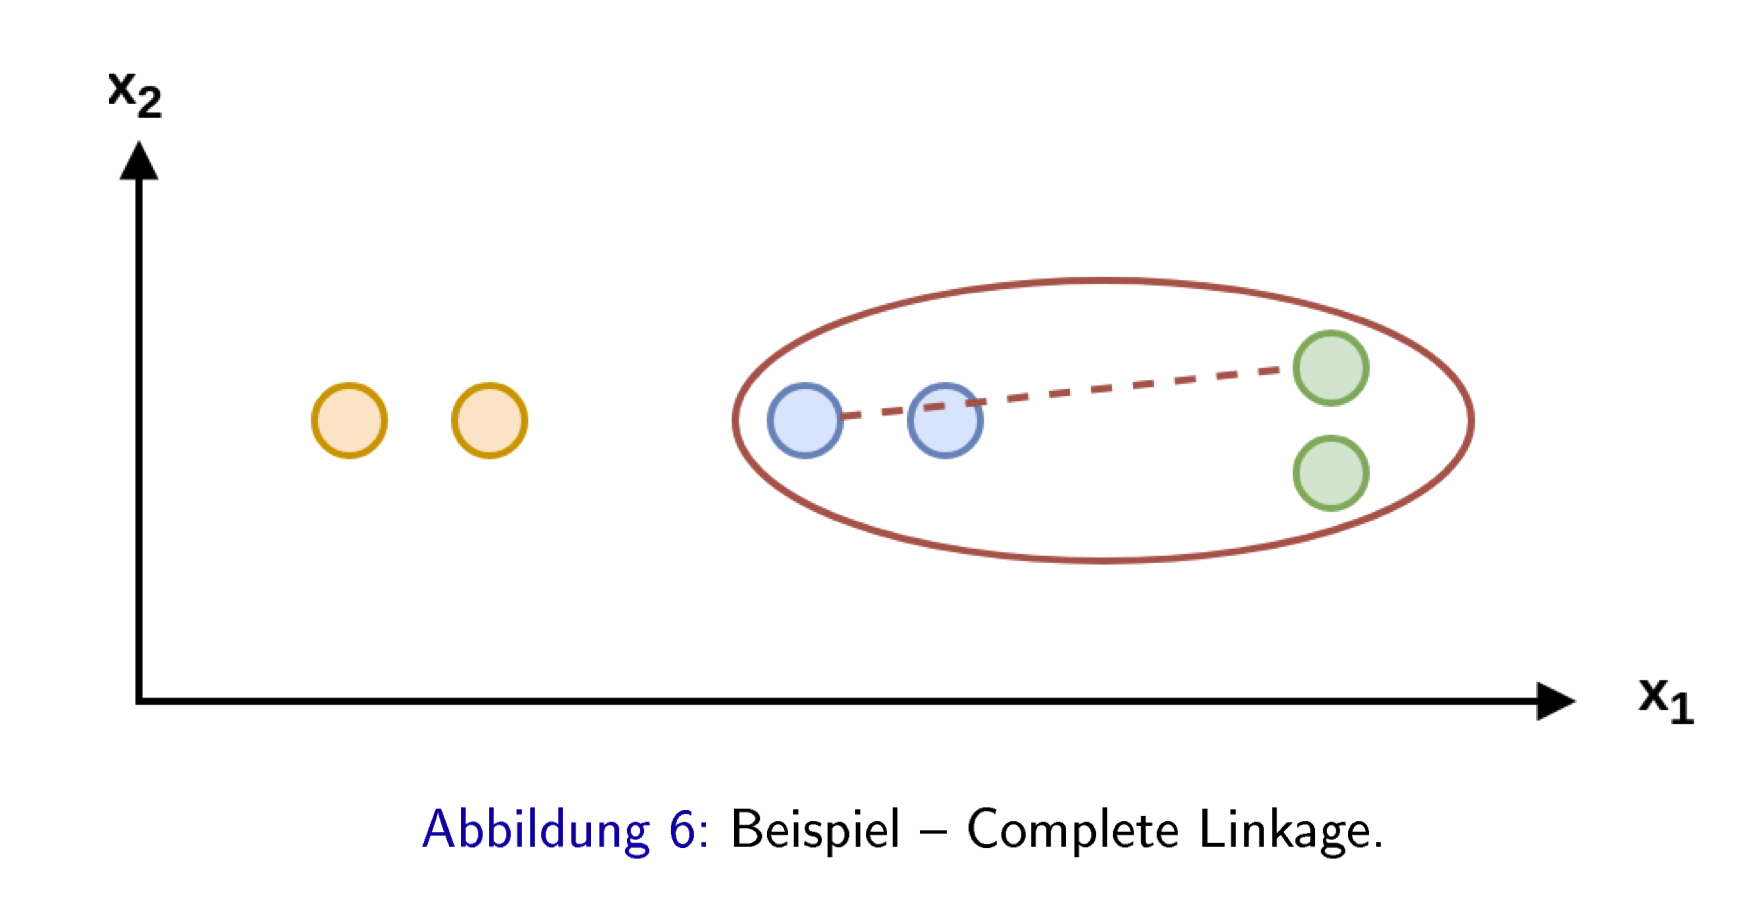

In [10]:
# Bild anzeigen
image_path = "media/complete.png"  # Pfad zum Bild
display(Image(filename=image_path))

### Abbildung: Beispiel - Single Linkage

Beispiel - Single Linkage.

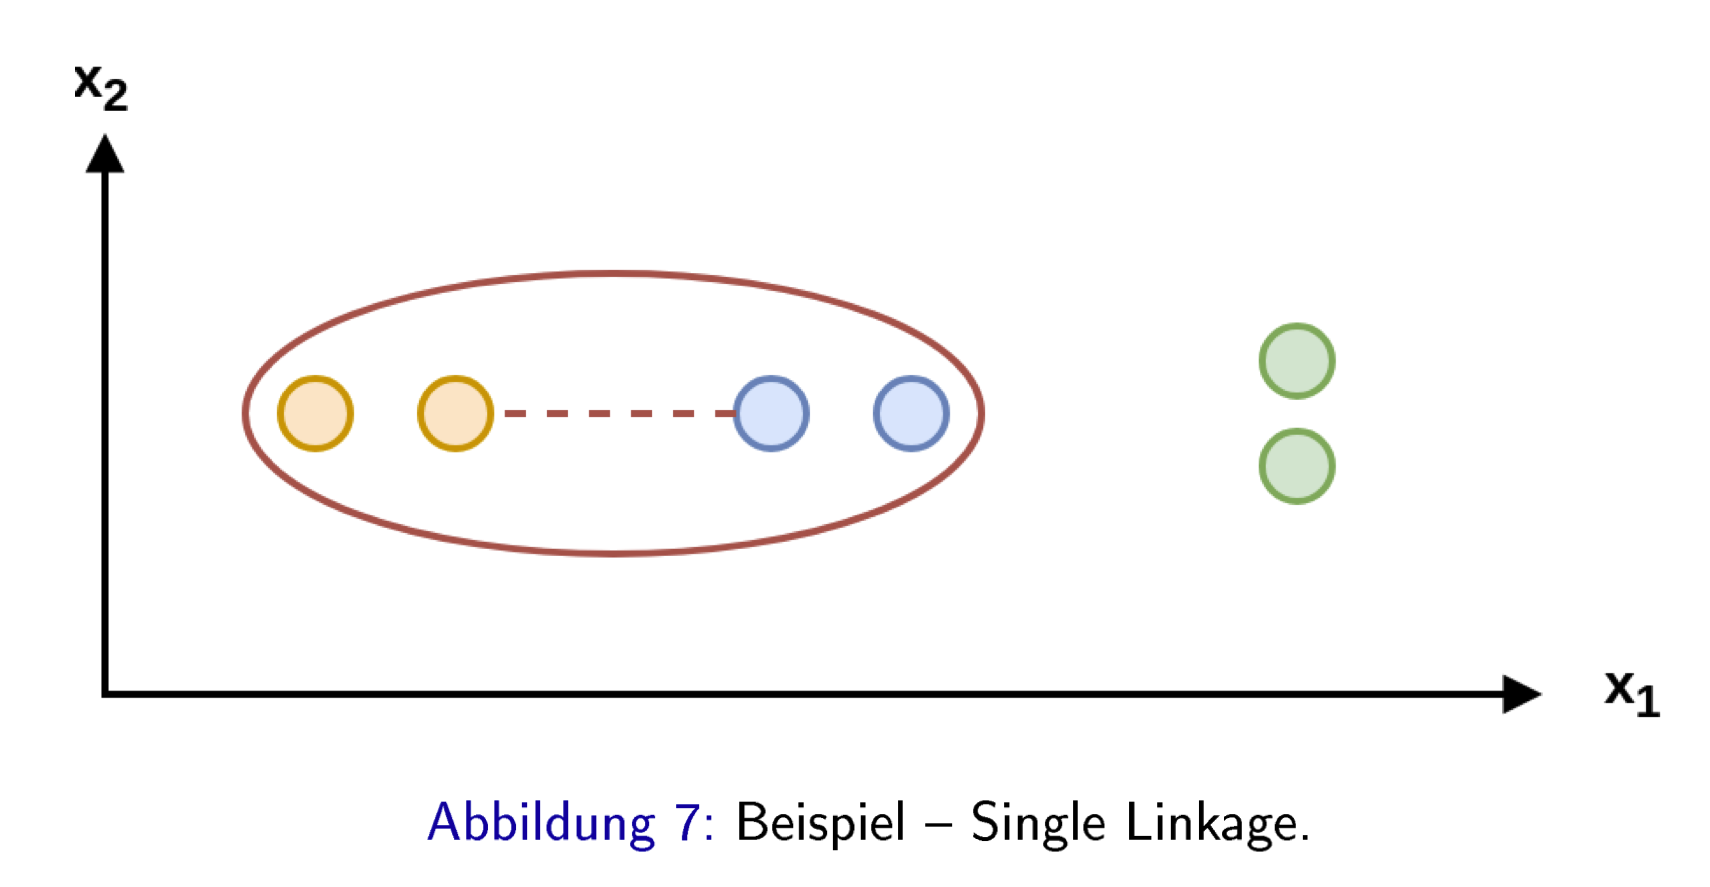

In [11]:
# Bild anzeigen
image_path = "media/single.png"  # Pfad zum Bild
display(Image(filename=image_path))

### Abbildung: Beispiel - Average Linkage

Beispiel - Average Linkage.

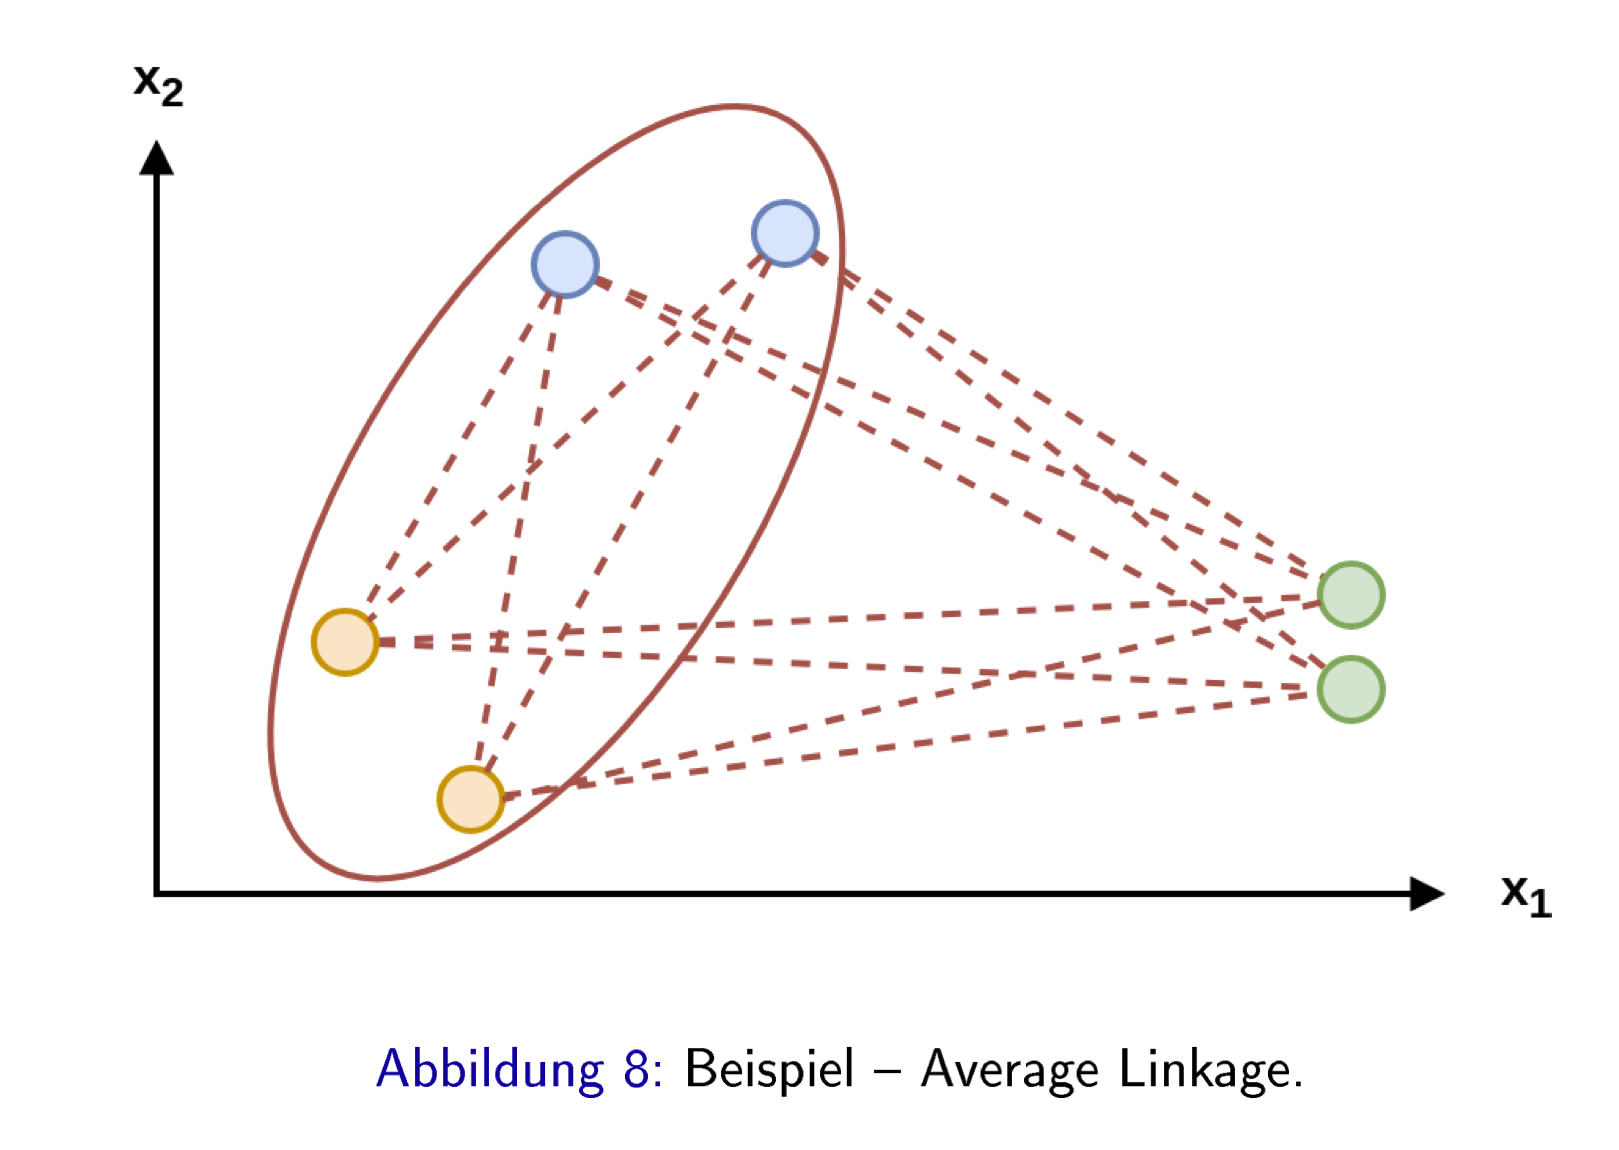

In [12]:
# Bild anzeigen
image_path = "media/average.png"  # Pfad zum Bild
display(Image(filename=image_path))

### Abbildung: Beispiel - Centroid Linkage

Beispiel - Centroid Linkage.

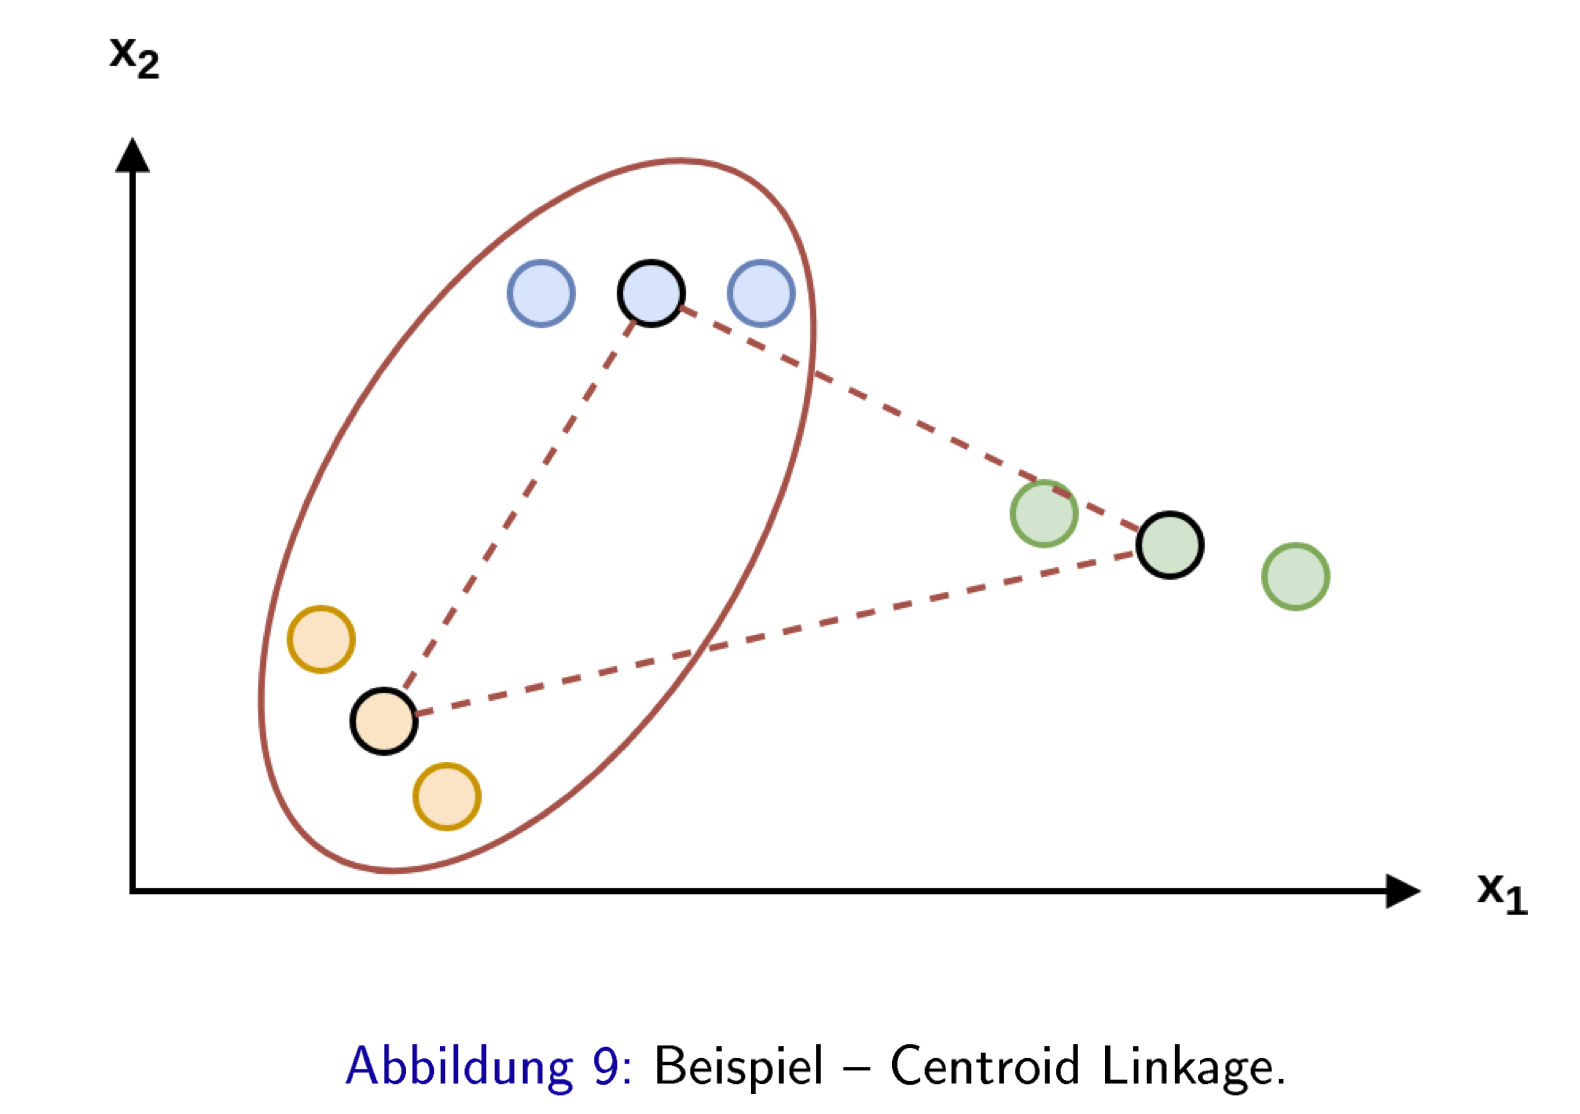

In [13]:
# Bild anzeigen
image_path = "media/centroid.png"  # Pfad zum Bild
display(Image(filename=image_path))

### Hierarchischer Clustering Algorithmus

Der Hierarchische Clustering Algorithmus kann nun beschrieben werden durch:

Algorithm 2 hierarchic\_cluster($D$, $d$)

1. $N = \{LEAF(i) \,|\, 1 \leq i \leq n\}$
2. while $|N| > 1$ do
3. $a, b = \arg\min_{i, j \in N, i \neq j} d(i, j)$
4. $N = N \setminus \{a, b\} \cup NODE(a, b, d(a, b))$
5. end while
6. return root\_node mit $N = \{root\_node(a, b, d)\}$

### Abbildung: Hierarchisches Clustering mit verschiedenen Linkage Definitionen

Hierarchisches Clustering mit drei unterschiedlichen Linkage Definitionen. Average und Complete Linkage führen meist zu balancierteren Clustern als Single Linkage. 

### Hinweise zu Varianzmaß

Hinweise:

- Das Varianzmaß sollte wohlüberlegt gewählt werden, so muss geprüft werden, ob die euklidische Distanz Sinn macht. Gegenbeispiel: Clustering von Käufertypen, da hierbei generell seltene Einkäufer gruppiert werden würden.
- Es sollte geprüft werden, ob eine Normalisierung sinnvoll ist. Beispiel: Oft gekaufte Gegenstände würden Clusterbildung bestimmen.
- Generell sollte das Ergebnis des Clusterings unabhängig von der Methode überprüft werden. Besitzen die Cluster eine sinnvolle Interpretation oder sind sie lediglich zufällige Gruppierungen von Rauschen?
- Clustering ist meist erst der Startpunkt einer explorativen Datenanalyse.

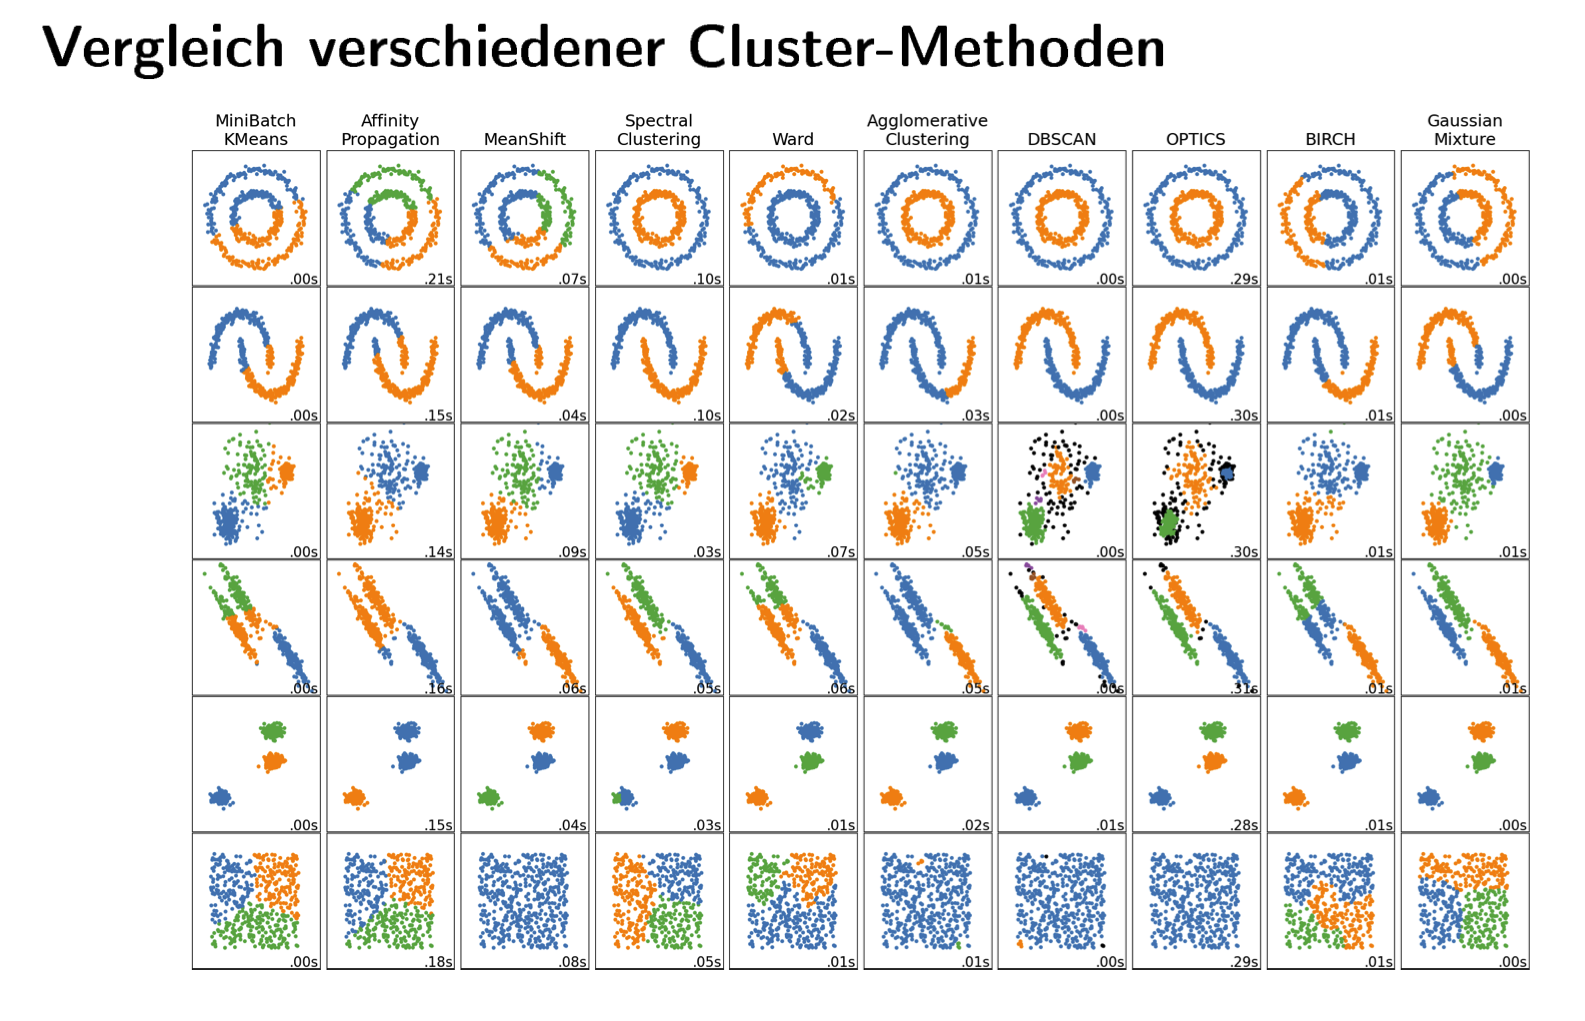

In [14]:
# Bild anzeigen
image_path = "media/comparison.png"  # Pfad zum Bild
display(Image(filename=image_path))